In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Wise ML/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data['Species'].unique() ## Multiclass

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

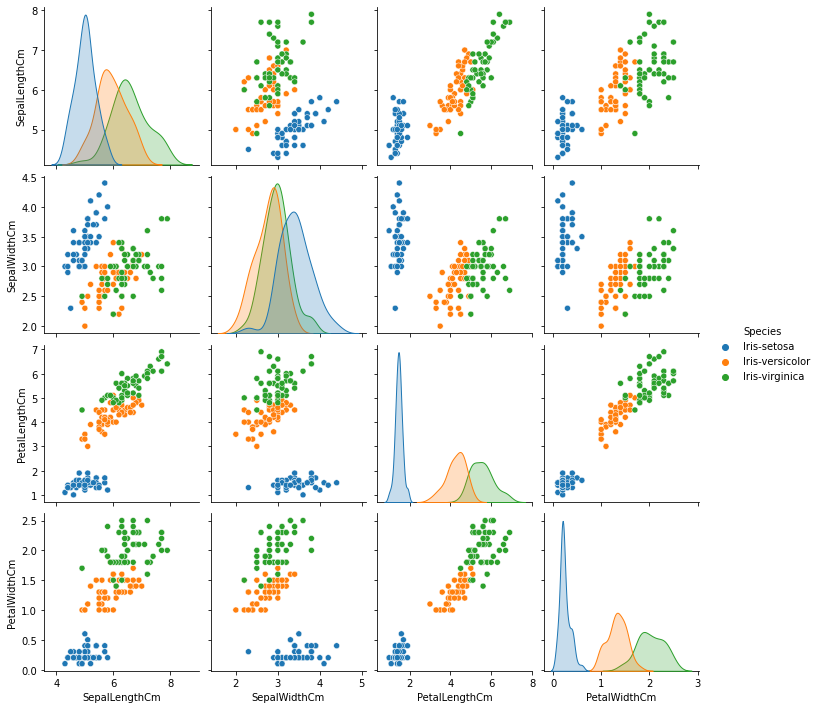

In [5]:
data = data.drop(['Id'], axis=1)

plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Species')
plt.show()
plt.close()

In [6]:
features = data.drop(['Species'], axis=1)
target = data['Species']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

**LOGISTIC REGRESSION:**

In [7]:
logreg_model = LogisticRegression(max_iter=110, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [8]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 95.876%
Testing Accuracy: 100.000%


**K-Nearest Neighbours:**

In [9]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

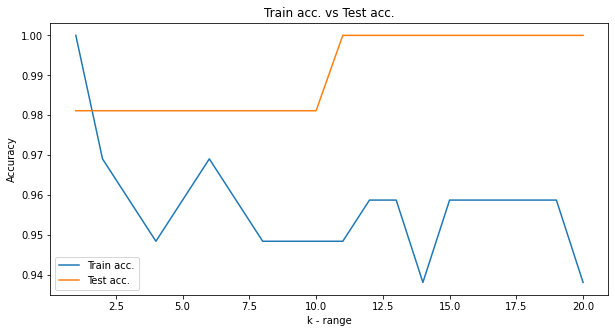

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 96.907%
Testing Accuracy: 98.113%


**DECISION TREES:**

**CART DT**

In [17]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 98.113%


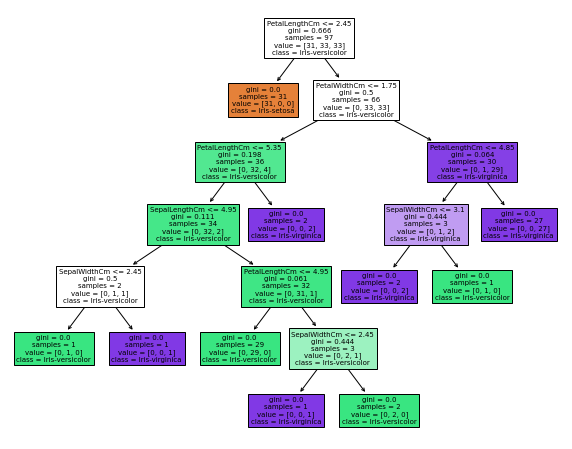

In [18]:
fig = plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=data['Species'].unique())
plt.show()

**ID3 DT**

In [14]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 98.113%


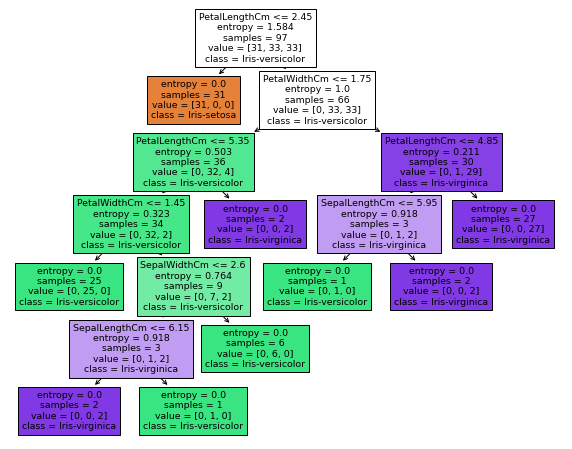

In [15]:
fig = plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True, feature_names=features.columns, class_names=data['Species'].unique())
plt.show()